In [ ]:
#| hide
from CARL.core import *

# CARL

> Collective Reinforcement Learning with Asymmetric Updating. Models confirmation and positivity biases in decision-making.

## Install

Clone repository:

```sh
git clone https://github.com/clembergerot/CARL.git
``` 

Enter CARL folder:

```sh
cd CARL
``` 

Install locally:

```sh
pip install .
```

## How to use

An example:

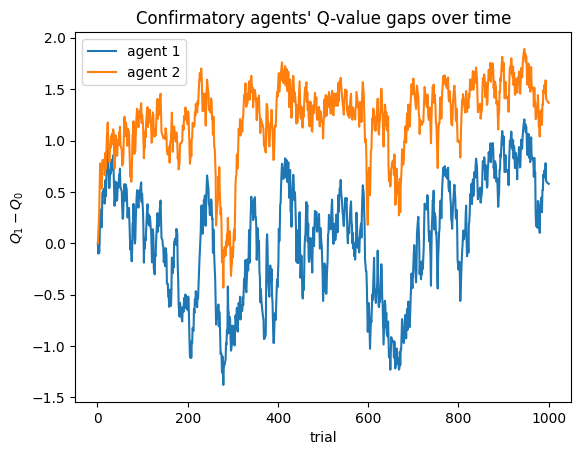

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from CARL.envs.TwoArmedBandit import TwoArmedBandit
from CARL.agents.SimpleConf import SimpleConf

# Define parameters
alphaC = 0.3  # confirmatory learning rate
alphaD = 0.1  # disconfirmatory learning rate
beta = 4.  # inverse temperature
p0 = 0.6  # reward probability arm 1
p1 = 0.4  # reward probability arm 2
rew = 1  # reward value
pun = -1  # punishment value
n_agents = 2 # number of agents in the group
n_trials = 1000  # number of trials

# Run a simulation with 2 confirmatory agents
pars_agent = np.array([alphaC/n_agents, alphaD/n_agents, beta])  
pars_simu = np.row_stack((pars_agent,) * n_agents) 
agents = SimpleConf(pars_simu)
task = TwoArmedBandit(p0, p1, rew, pun)  # define 2-armed bandit task
G = agents.connect_agents_full()  # agents are fully connected
Qtable = np.zeros((n_agents, 2))  # initialize Q-table
Q = np.zeros((n_trials, n_agents, 2))
for t in range(1, n_trials):
    choices = agents.all_take_action(Qtable)
    payoffs = task.return_payoffs(choices)
    Qtable = agents.update_Qvalues(G, choices, payoffs, Qtable)
    Q[t] = Qtable

# Plot both agents' Q-value gaps over time
plt.figure()
plt.plot(np.arange(1, n_trials+1), Q[:, 0, 0] - Q[:, 0, 1], label="agent 1")
plt.plot(np.arange(1, n_trials+1), Q[:, 1, 0] - Q[:, 1, 1], label="agent 2")
plt.xlabel("trial")
plt.ylabel(r'$Q_1 - Q_0$')
plt.title("Confirmatory agents' Q-value gaps over time")
plt.legend()
plt.show()